In [33]:
import pandas as pd
import numpy as np
#import pickle
from sklearn.model_selection import train_test_split

In [34]:

df = pd.read_csv('/Users/liu/Desktop/ML individual work/train.csv')

In [35]:
df.columns

Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')

In [36]:
df['C1'].value_counts()

2569487005    8430
2108523568       7
2084406919       6
3438432991       5
256353298        5
              ... 
1427705163       1
4180196685       1
596547023        1
3559230936       1
77004800         1
Name: C1, Length: 22595, dtype: int64

In [37]:
df['C3'].value_counts()

1928325921    1232
3475347077    1212
2780744710    1179
1711803242     936
1822656032     536
              ... 
3540895230       1
2756181513       1
3550862535       1
1199484467       1
1533319149       1
Name: C3, Length: 2863, dtype: int64

In [38]:
df['C10'].value_counts()

3469607743    1425
3458698981      82
3183725626      73
1133005353      71
3662869197      68
              ... 
843115400        1
762569609        1
4142922634       1
830608273        1
487200771        1
Name: C10, Length: 28653, dtype: int64

In [39]:
label = df['label'].values

In [40]:
data = df.drop(columns=['label','id','visitTime','purchaseTime','C1','C3','C10']).values

In [41]:
X = data.copy()
y = np.array(label.copy())
y[:5]

array([-1, -1, -1, -1, -1])

# In the following, we try to build a baseline model (which is not the optimal solution)

# Split data into training and testing

In [42]:
y = (y > 0)*1
nb_class = len(set(y))
print(nb_class)
id_Train = np.array([None]*nb_class)
id_Test = np.array([None]*nb_class)
for i in range(nb_class):
    id_i = np.where(y==i)[0]
    id_i_train, id_i_test = train_test_split(id_i, test_size=0.2)
    id_Train[i] = id_i_train
    id_Test[i] = id_i_test

id_Train = np.concatenate(id_Train)
id_Test = np.concatenate(id_Test)

X_train = X[id_Train]
Y_train = y[id_Train]
X_test = X[id_Test]
Y_test = y[id_Test]

2


In [43]:
set(y)

{0, 1}

In [44]:
X_train[0]

array([        10,  403381353,  652481754, 2116767313, 4003458018,
       2303407174, 2374954832,          0, 1421481761,          0,
                3,          0,          0,          0,          0,
                3,          0,          0,  621902171, 3706004275])

Re-sampling

In [45]:
id_toTrain = np.array([np.where(Y_train==i)[0] for i in range(nb_class)])

size_max = [len(id_toTrain[i]) for i in range(nb_class)]
print("before resampling")
print(size_max)

blc = 150
for i in range(len(size_max)):
    if size_max[i] > blc:
        size_max[i] = int(blc*(np.log10(size_max[i]/blc)+1))
    else:
        size_max[i] = int(blc/(np.log10(blc/size_max[i])+1))

print("after resampling")
print(size_max)
for i in range(nb_class):
    if len(id_toTrain[i]) > size_max[i]:
        id_toTrain[i], tmp = train_test_split(id_toTrain[i], test_size=1-size_max[i]/len(id_toTrain[i]))
    else:
        id_toTrain[i] = np.concatenate((id_toTrain[i], id_toTrain[i][np.random.randint(len(id_toTrain[i]), size=int(size_max[i]-len(id_toTrain[i])))]))
id_toTrain = np.concatenate(id_toTrain)
X_toTrain = X_train[id_toTrain]
Y_toTrain = Y_train[id_toTrain]

before resampling
[25096, 45]
after resampling
[483, 98]


# If you want to work with xgboost, you should use xgboost from sklearn to predict the probability (here is another xgboost package)

In [46]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dTrain = xgb.DMatrix(X_toTrain,label=Y_toTrain)
dTest = xgb.DMatrix(X_test)
dtrain = xgb.DMatrix(X_train)
dPred = xgb.DMatrix(X)

clf = xgb.train({'max_depth': 60, 'num_class': nb_class, 'gamma': 10,'colsample_bytree': 0.4, 'subsample': 0.7, 'num_round': 10000, 'min_child_weight': 4, 'n_estimators': 2000, 'n_jobs': -1, 'learning_rate': 0.01, 'reg_alpha': 0.5},dTrain, num_boost_round = 200)


[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 8 pruned nodes, max_depth=1
[13:39:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 6 pruned nodes, max_depth=1
[

In [47]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [68]:
model2 = xgb.XGBRegressor()
model2.fit(X_toTrain, Y_toTrain)
y_pred = model2.predict(X_test)
model2.score(X_test, Y_test)
model2.score()

-2.5846227741731855

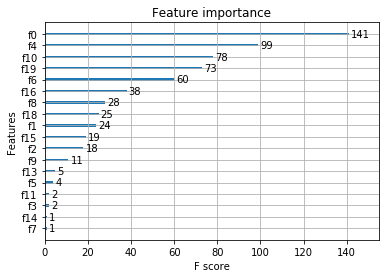

In [69]:
from xgboost import plot_importance
plot_importance(model2)
plt.show() 

In [73]:
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)


# Fit randomized_mse to the data
xgb_random.fit(X_toTrain, Y_toTrain)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'n_estimators': 16, 'max_depth': 9, 'learning_rate': 0.55, 'colsample_bytree': 0.6}
Best accuracy found:  0.9879664619744921


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


In [77]:
test = pd.read_csv("/Users/liu/Desktop/ML individual work/test1.csv")
test = test.drop(columns=['label','id','visitTime','purchaseTime','C1','C3','C10']).values


In [81]:
xgb_pred = xgb_random.predict(test)
submission = pd.concat([pd.DataFrame(test), pd.DataFrame(xgb_pred)], axis = 'columns')
submission.to_csv('/Users/liu/Desktop/ML individual work/result.csv', header = True, index = False)

In [18]:

clf.save_model("first_model.m")


In [19]:
clf.load_model("first_model.m")

In [ ]:
#ypred = clf.predict

In [1]:
#Y_pred = clf.predict(dTest)
#print(classification_report(Y_test,Y_pred))


NameError: name 'clf' is not defined

In [ ]:
#Y_pred = clf.predict(dtrain)
#print(classification_report(Y_train,Y_pred))

In [ ]:
#Y_to_pred = clf.predict(dPred)
#print([len(np.where(Y_to_pred==i)[0]) for i in range(nb_class)])


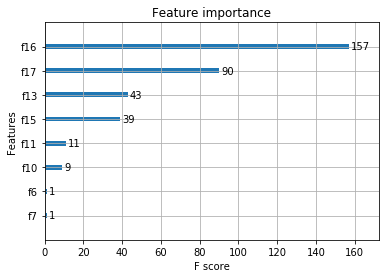

In [27]:
xgb.plot_importance(clf, importance_type = 'weight', max_num_features=15)
plt.show()

As we may seen, the baseline model is not so good. You should do some improvements. Here is one of the final results that we've obtained:

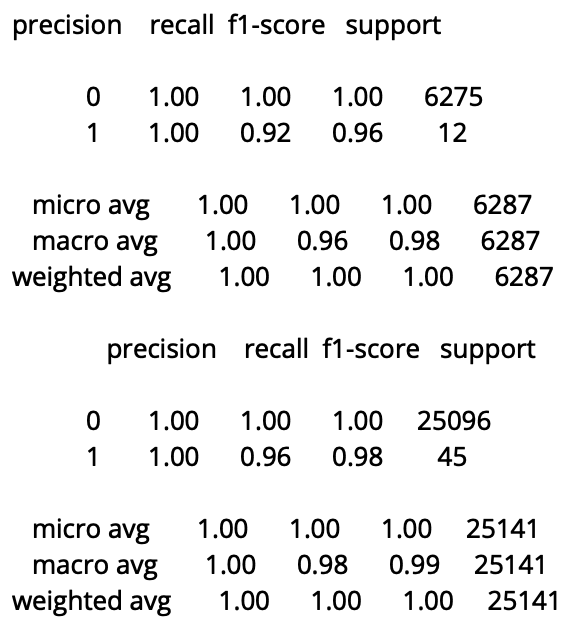